# Решение задачи регрессии с помощью нейронной сети

Дисциплина: "**Системы поддержки принятия решений**"

**Подготовил**: Лосев А. П., гр. ИСТ-131м, **вариант 6**.

Метод оптимизации — **SGD**, число нейронов в скрытом слое — **20**, шаг градиентного спуска — **0,01**.

**Принял**: Литвинов В. Л.

Импорт необходимых зависимостей:

In [1]:
import torch 
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

Генерация тренировочного датасета посредством использования множества точек из равномерного распределения и создание синусоидальной зависимости:

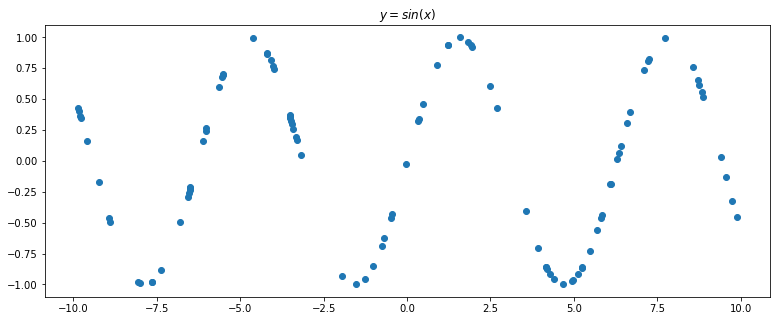

In [3]:
x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');

Использование аддитивного шума, полученного из нормального распределения, для создания обучающей выборки

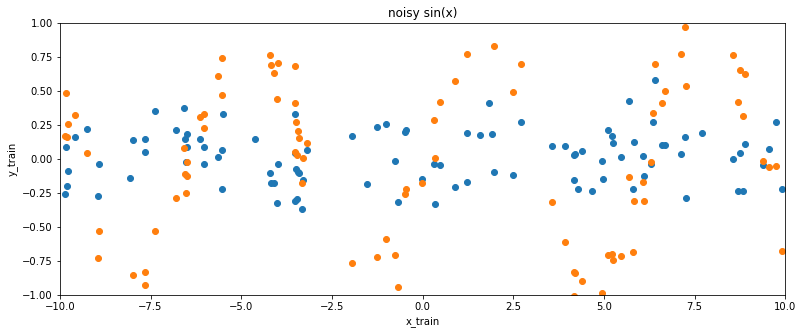

In [4]:
noise = torch.randn(y_train.shape) / 5.
plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');
y_train = y_train + noise
plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

Корректировка размерности входных данных с использованием метода unsqueeze()

In [5]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1);

Создание валидационного датасета, представляющего из себя выборку точек синусоидальной функции:

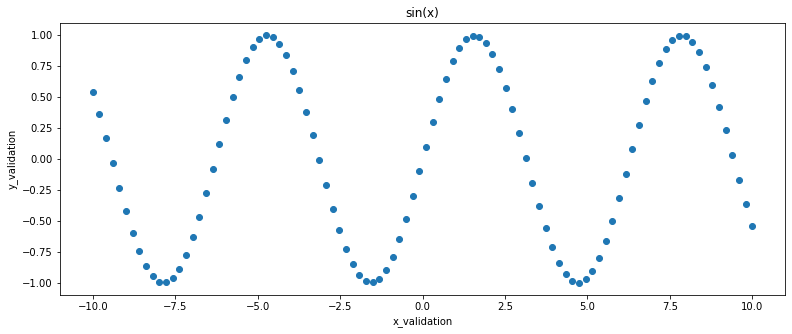

In [6]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

Создание нейронной сети как класса, наследуемого от класса torch.nn.Module, и создание необходимой конфигурации слоёв, а также выбор функции активации:

In [7]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, 20)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(20, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

При создании модели нейронной сети студент использовал вариант 6, соответственно, изначальное количество нейронов в скрытом слое — 20. Изменение количества нейронов показало, что 20 — оптимальное количество для данной конфигурации нейросети.

Предсказание, полученное нейросетью без обучения, со стандартными весами нейронов и смещениями:

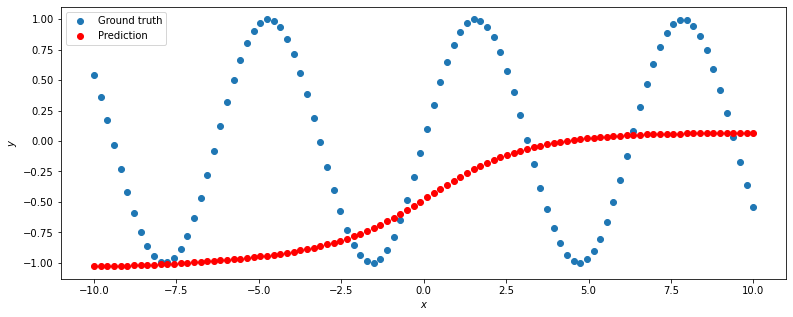

In [8]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

Выбор подходящего оптимизатора:

In [9]:
optimizer = torch.optim.SGD(sine_net.parameters(), lr=0.00976, momentum=0.996)

При создании модели нейронной сети студент использовал вариант 6, соответственно, метод оптимизации — SGD, и изначальный шаг градиентного спуска — 0.01.

Создание функции потерь для нейросети, служащей для вычисления градиента:

In [10]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

Проведение тренировки нейросети на основе информации от функции потерь:

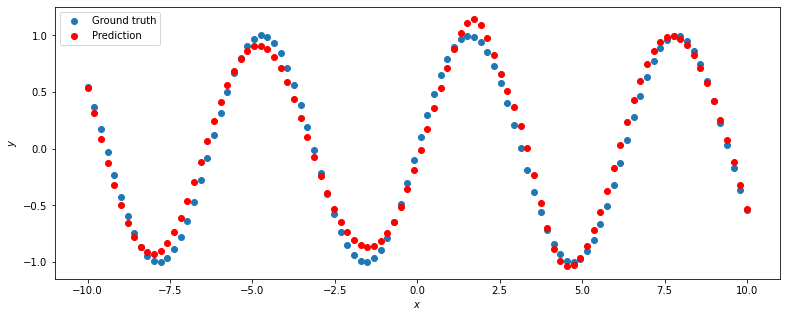

In [11]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

Данная конфигурация нейросети осуществляет предсказание для функции синуса, осуществим создание нейросети, которая предсказывает функцию $y=2^{x}*sin(2^{-x})$. Для этого повторим некоторые шаги, выполненные для синусоидальной функции:

Генерация тренировочного датасета посредством использования множества точек из равномерного распределения и создание зависимости $y=2^{x}*sin(2^{-x})$:

In [12]:
def  target_function(x):
       return 2**x * torch.sin(2**-x)

# ------Dataset preparation start--------
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)
# ------Dataset prepclassaration end--------

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3338e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

Создание класса нейронной сети для предсказания данного типа зависимости:

In [13]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

sine_net = SineNet(50)

Предсказание, полученное нейросетью без обучения, со стандартными весами нейронов и смещениями:

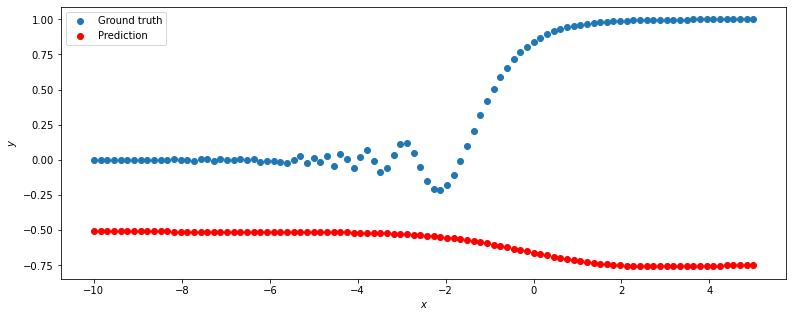

In [14]:
def predict(net, x, y):
    y_pred = net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Ground truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

predict(sine_net, x_validation, y_validation)

Выбор подходящего оптимизатора:

In [15]:
optimizer = torch.optim.SGD(sine_net.parameters(), lr=0.014, momentum=0.996)

При создании модели нейронной сети студент использовал вариант 6, соответственно, метод оптимизации — SGD, и изначальный шаг градиентного спуска — 0.01.

Создание функции потерь для нейросети, служащей для вычисления градиента:

In [16]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

Проведение тренировки нейросети на основе информации от функции потерь:

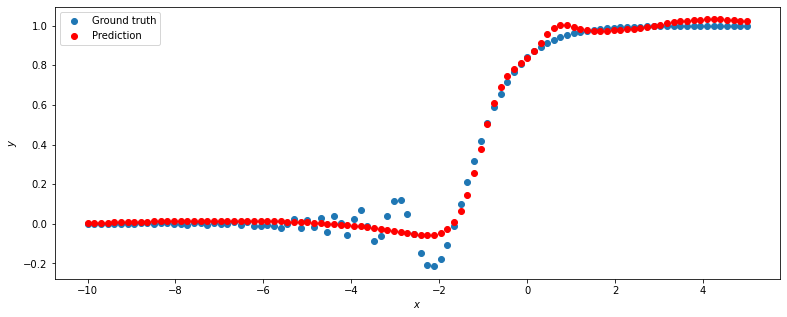

In [17]:
for epoch_index in range(2000):
    optimizer.zero_grad()

    y_pred = sine_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()

predict(sine_net, x_validation, y_validation)

Вычисление метрики для данной функции:

In [18]:
def metric(pred, target):
        return (pred - target).abs().mean()

print(metric(sine_net.forward(x_validation), y_validation).item())

0.030253643169999123


Метрика для данного случая соответствует необходимому диапазону, значит, обучение и предсказание прошло успешно.

**Выводы:** при выполнении лабораторной работы были получены практические навыки решения задачи линейной регрессии при помощи искусственных нейронных сетей. Данные навыки были применены как для функции синуса, так и при работе с функцией $y=2^{x}*sin(2^{-x})$. При выполнении задания велась оптимизация конфигурации параметров нейронной сети при помощи манипулирования количеством нейронов, методом оптимизации и шагом градиентного спуска.